,time_spent_risk,cells,selfish,time_spent_prop,count_effort,Honesty_Humility,Extraversion,Agreeableness,min_offer
0,43000,26,60,31000,20,4.2,3.0,2.8,50
1,12000,7,20,38000,20,1.9,4.4,2.9,50
2,88000,50,20,69000,12,3.3,3.8,3.4,80
3,24000,50,60,26000,14,3.6,3.8,2.6,50
4,137000,24,60,43000,4,3.6,2.5,2.7,100


<Figure size 432x288 with 0 Axes>

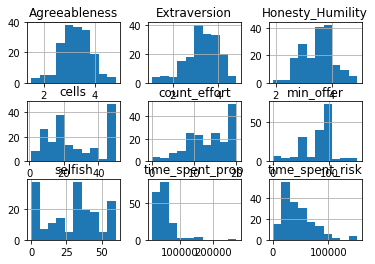

<Figure size 432x288 with 0 Axes>

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sb

#fix rnd seed
np.random.seed(7)

MAX_GAIN = 200

# Read and sanitize the data
df = pd.read_excel("../data/UG_HH_NEW_continuous_no200.xls")
df = df.dropna()
df = df.dropna()
df = df[['time_spent_risk', 'cells', 'selfish', 'time_spent_prop', 'count_effort',
         'Honesty_Humility','Extraversion', 'Agreeableness', 'min_offer']]

MAX_ACCEPTABLE_MIN_OFFER = 150
df = df[df['min_offer'] <= MAX_ACCEPTABLE_MIN_OFFER]


#print(df[50:])

# Show head and histograms
display(df.head())
df.hist()

# Plot sample figure for min_offers
plt.figure()

#x = range(0, len(df['prop']))
#x1 = df['min_offer']

#plt.plot(x, x1)

In [2]:
# sb.pairplot(df, x_vars=('prop','other_resp','other_prop'), y_vars='min_offer', height=7, aspect=0.7, kind='reg')
# sb.pairplot(df, x_vars=('cells', 'selfish','count_effort'), y_vars='min_offer', height=7, aspect=0.7, kind='reg')
# sb.pairplot(df, x_vars=('Honesty_Humility', 'Extraversion','Agreeableness'), y_vars='min_offer', height=7, aspect=0.7, kind='reg')
# sb.pairplot(df, x_vars=('time_spent_prop', 'time_spent_risk'), y_vars='min_offer', height=7, aspect=0.7, kind='reg')

In [3]:
#manual ablation
#df = df.drop(columns=['cells','selfish','count_effort','Honesty_Humility','Extraversion','Agreeableness','time_spent_risk','time_spent_prop'])

In [4]:
from sklearn.linear_model import LinearRegression
# Split into inputs and oututs
x = df.iloc[:, :-1].values

y = df.iloc[:, -1:].values
NB_FEATURES = x.shape[1]
NORMALISE_DATA = True


x = df.values[:, :-1]
y = df.values[:, -1:]

if NORMALISE_DATA:
    x_min = x.min(axis=0)
    x_max = x.max(axis=0)
    x = (x - x_min) / (x_max - x_min)
    
NB_FEATURES = x.shape[1]
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/3, random_state = 0)
#print(xTrain)
#print(yTrain)

# regressor = LinearRegression(copy_X=True).fit(xTrain, yTrain)

# print("Intercept:", regressor.intercept_)
# print("Coef:", regressor.coef_)

# yPredict = regressor.predict(xTest)
# print("R2:", r2_score(yTest, yPredict))

# out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPredict)})
# #print(out_data)

# out_data.plot(figsize=(30,10))

In [5]:
@np.vectorize
def sigmoid(x):
    return np.exp(x) / (np.exp(x) + 1)

@np.vectorize
def sigmoid1024(x):
    base = 2000.0**2
    return (base**x/(base**x + 1))

@np.vectorize
def sigmoid128(x):
    return (128**x/(128**x + 1))

# @np.vectorize
# def loss(x):
#     x = (x+10) / 40
#     return (1 - (sigmoid1024(x) * np.cos(x/np.pi))) / 2
    
# @np.vectorize
# def gain(x):
#     return 2 - loss(x)

# @np.vectorize
def gain(x):
    x = (x - 32) / 40
    return (sigmoid1024(x) *  np.cos(x/np.pi))

@np.vectorize
def loss(x):
    x_ = (x) / 40
    x = (x + 0) / 40
    return (1 - sigmoid1024(x) *  np.cos(x_/np.pi))
    #return 1 - gain(x+24)

def gain(x):
    return 1 - loss(x)

Max value:  15.815815815815824 0.0


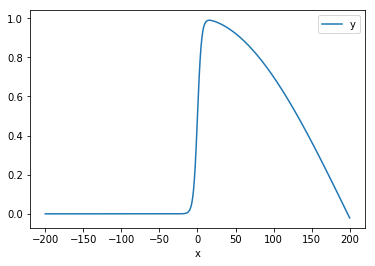

In [6]:
x = np.linspace(-200, 200, 1000)
y = gain(x)
print("Max value: ", x[y.argmax()], gain(-200))

df = pd.DataFrame({'x':x, 'y':y})
df.plot.line(x='x', y='y')

Min value:  15.815815815815824


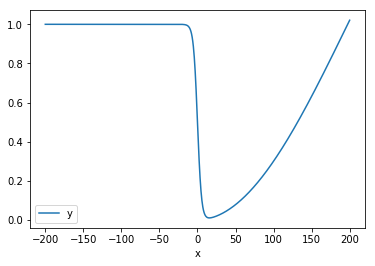

In [7]:
y = loss(x)
print("Min value: ", x[y.argmin()])

df = pd.DataFrame({'x':x, 'y':y})
df.plot.line(x='x', y='y')

In [8]:
from utils.data_augmentation import DACombine

ADD path: </home/franck/Desktop/MA-Thesis/code>
['', '/home/franck/anaconda3/lib/python36.zip', '/home/franck/anaconda3/lib/python3.6', '/home/franck/anaconda3/lib/python3.6/lib-dynload', '/home/franck/anaconda3/lib/python3.6/site-packages', '/home/franck/anaconda3/lib/python3.6/site-packages/IPython/extensions', '/home/franck/.ipython', '/home/franck/Desktop/MA-Thesis/code']
/home/franck/Desktop/MA-Thesis/code/notebooks/utils/data_augmentation.py


Using TensorFlow backend.


In [9]:
from models.deep import keras_linear_regression, keras_model, loss_tf, gain_tf, KerasModel

**Metrics**

In [10]:
MAX_GAIN = 200.0

def gain2(min_offer, predicted):
    res = MAX_GAIN - predicted
    res[predicted < min_offer] = 0
    return res

def gain_mean2(min_offer, predicted):
    res = MAX_GAIN - predicted
    res[predicted < min_offer] = 0
    return res.mean()

**Model: No data Augmentation**

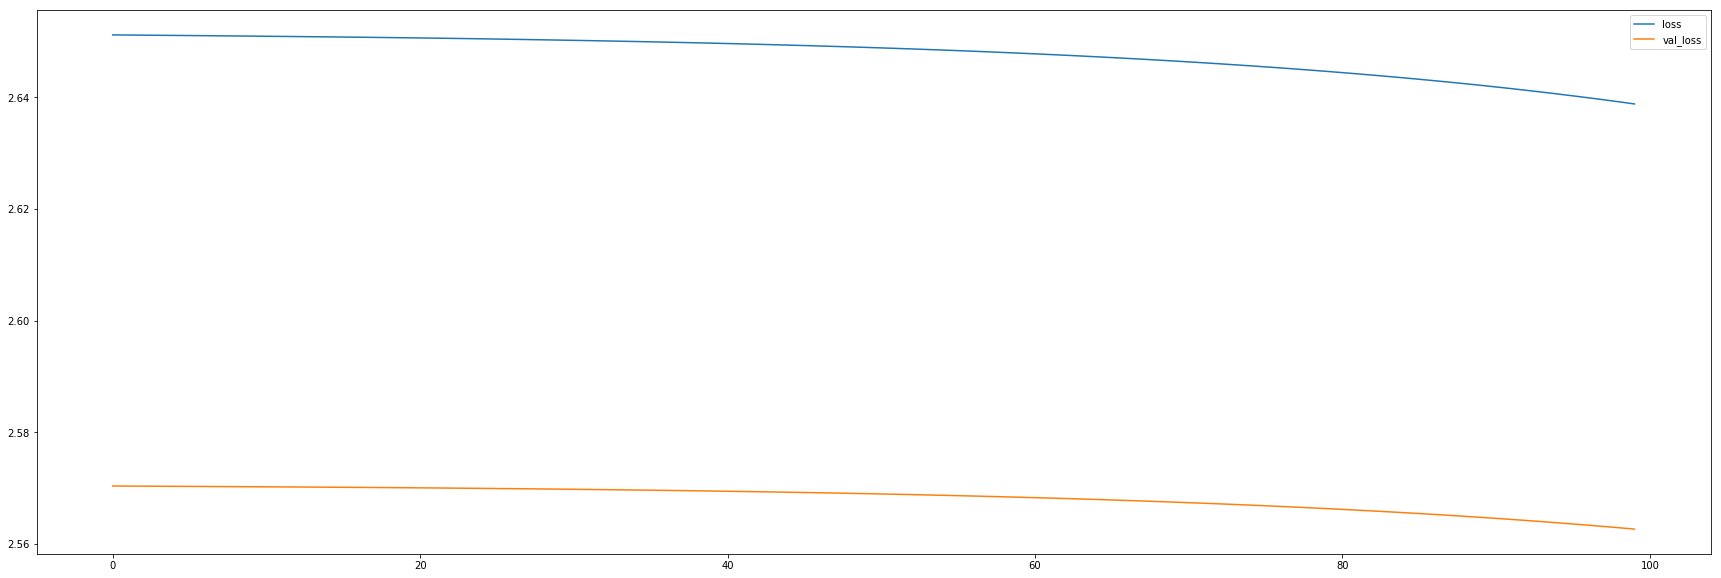

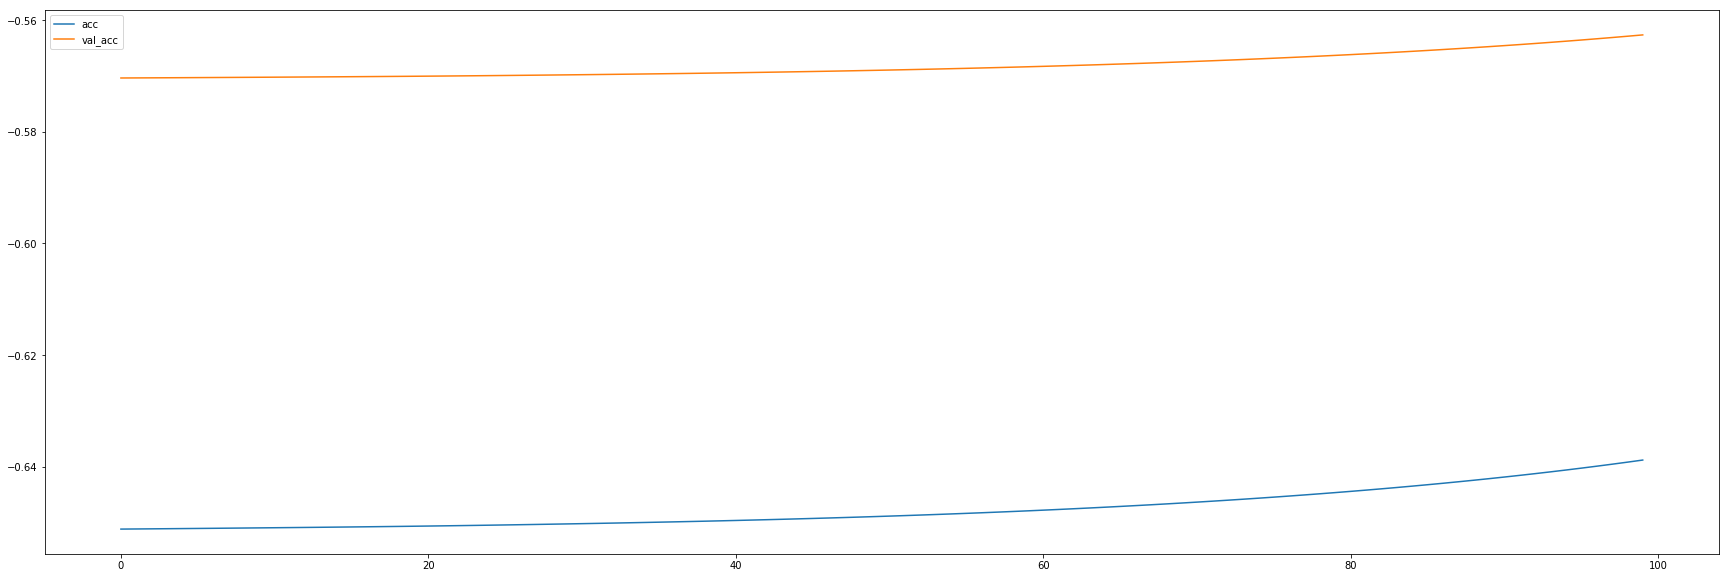

In [11]:
#sci-kit like training
model = KerasModel(loss=loss_tf, metrics=[gain_tf], batch_size=60, epochs=100)
da = DACombine()
xTrain_a, yTrain_a = xTrain, yTrain
split = int(xTrain.shape[1] * 0.75)
xTrain_a, yTrain_a = xTrain[:split], yTrain[:split]
xVal, yVal = xTrain[split:], yTrain[split:]
#xTrain_a, yTrain_a = da.fit_predict(xTrain, yTrain, size=1024, distance=10)
history = model.fit(xTrain_a.astype('float'), yTrain_a.astype('float'),  validation_data=(xVal, yVal), verbose=0)

#print(history.history)

loss_hist = pd.DataFrame(data={'loss': history.history['loss'], 'val_loss': history.history['val_loss']})
loss_hist.plot(figsize=(30,10))

acc_hist = pd.DataFrame(data={'acc': history.history['gain_tf'], 'val_acc': history.history['val_gain_tf']})
acc_hist.plot(figsize=(30, 10))

yPred = model.predict(xTest, batch_size=128)

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
#stl = model.score(xTest, yTest, verbose=0)

array([148.16042, 135.54962, 165.64862, 167.54625, 147.04903, 168.37685,
       142.08038, 154.70642, 155.76492, 169.46883, 155.8152 , 148.60387,
       152.02356, 165.3408 , 158.4636 , 155.42601, 161.29056, 162.51196,
       156.19257, 147.09496, 139.05994, 144.4901 , 151.54756, 139.51985,
       129.79886, 171.19368, 159.66179, 137.05777, 139.30951, 138.60185,
       154.94987, 161.84319, 156.61206, 161.98299, 166.14563, 165.37712,
       146.28358, 143.42993, 163.36847, 150.14493, 138.56635, 123.53524,
       155.35434, 176.29205, 153.74019, 138.68413, 150.77538, 150.10338,
       139.20917, 175.67587, 136.43573, 141.49167, 133.89203, 149.4295 ,
       167.61577, 156.65237, 163.96924, 176.62474, 182.13977, 165.98013],
      dtype=float32)

gain_mean:  0.0


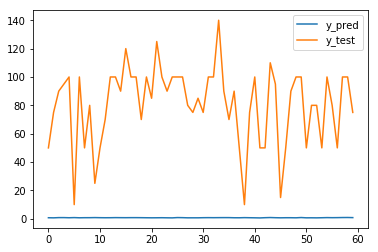

In [13]:
yPred = model.predict(xTest)

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = model.predict(xTest)
print("gain_mean: ", gain_mean2(yTest.ravel(), yPred.ravel()))

**Model with data augmentation**

In [14]:
#sci-kit like training
model = keras_model(loss=loss_tf, metrics=[gain_tf])
da = DACombine()
split = int(xTrain.shape[1] * 0.75)
xTrain_a, yTrain_a = xTrain[:split], yTrain[:split]
xVal, yVal = xTrain[split:], yTrain[split:]
xTrain_a, yTrain_a = da.fit_predict(xTrain_a, yTrain_a, size=xTrain_a.shape[1]*16, distance=10, retarget=True, distribution=True, combine=True)
history = model.fit(xTrain_a.astype('float'), yTrain_a.astype('float'), validation_data=(xVal, yVal), epochs=100, batch_size=64, verbose=0)
loss_hist = pd.DataFrame(data={'loss': history.history['loss'], 'val_loss': history.history['val_loss']})
loss_hist.plot(figsize=(30,10))

acc_hist = pd.DataFrame(data={'acc': history.history['gain_tf'], 'val_acc': history.history['val_gain_tf']})
acc_hist.plot(figsize=(30, 10))

yPred = model.predict(xTest, batch_size=128)

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
#stl = model.score(xTest, yTest, verbose=0)

TypeError: keras_model() missing 1 required positional argument: 'nb_features'

In [ ]:
yPred = model.predict(xTest)

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = model.predict(xTest)
print("gain_mean: ", gain_mean2(yTest.ravel(), yPred.ravel()))

** Model using _mse_ loss and data augmentation**

In [ ]:
#sci-kit like training
model = keras_model(loss='mse', metrics=[gain_tf])
da = DACombine()
split = int(xTrain.shape[1] * 0.75)
xTrain_a, yTrain_a = xTrain[:split], yTrain[:split]
xVal, yVal = xTrain[split:], yTrain[split:]
xTrain_a, yTrain_a = da.fit_predict(xTrain_a, yTrain_a, size=xTrain_a.shape[1]*16, distance=10, retarget=True, distribution=True, combine=True)
history = model.fit(xTrain_a.astype('float'), yTrain_a.astype('float'), validation_data=(xVal, yVal), epochs=100, batch_size=64, verbose=0)
loss_hist = pd.DataFrame(data={'loss': history.history['loss'], 'val_loss': history.history['val_loss']})
loss_hist.plot(figsize=(30,10))

acc_hist = pd.DataFrame(data={'acc': history.history['gain_tf'], 'val_acc': history.history['val_gain_tf']})
acc_hist.plot(figsize=(30, 10))

yPred = model.predict(xTest, batch_size=128)

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
#stl = model.score(xTest, yTest, verbose=0)

In [ ]:
yPred = model.predict(xTest)

out_data = pd.DataFrame(data={'y_test': np.ravel(yTest), 'y_pred': np.ravel(yPred)})
out_data.plot()

yPred = model.predict(xTest)
print("gain_mean: ", gain_mean2(yTest.ravel(), yPred.ravel()))

In [ ]:
# from sklearn.svm import SVC, LinearSVC, LinearSVR

# model = SVC(gamma='auto', kernel='rbf')
# model = LinearSVC()
# da = DACombine()
# split = int(xTrain.shape[0] * 0.25)
# #xTrain_a, yTrain_a = xTrain[:split], yTrain[:split]
# xTrain_a, yTrain_a = xTrain.copy(), yTrain.ravel().copy()
# #yTrain_a[yTrain_a < 75] = 50
# #yTrain_a[yTrain_a >= 75] = 100
# #xVal, yVal = xTrain[split:], yTrain[split:]
# xTrain_a, yTrain_a = da.fit_predict(xTrain_a, yTrain_a, size=xTrain_a.shape[1]*16, distance=5, retarget=True, distribution=True, combine=True)

# model.fit(xTrain_a, yTrain_a.ravel())

# yPred = model.predict(xTest)
# print(yPred - yTest.ravel())

# #model.classes_
# model.predict(xTrain_a)
# print("Gain mean:", gain_mean2(yTest.ravel(), yPred.ravel()))
# print("mse: ", mse(yTest.ravel(), yPred))

# print(yPred)

In [ ]:
from sklearn.svm import SVC, SVR, LinearSVR
from sklearn.linear_model import LogisticRegression

def ultimatum_score(y_true, y_pred):
    res = MAX_GAIN - y_pred
    res[y_pred < y_true] = 0
    return res.mean()
    

class AcceptanceModel(object):
    def __init__(self, base_model=None, max_gain=MAX_GAIN, step=5, zero_one=True, metric=None):
        """
        :param base_model: a model with fit/predict functions (classification)
        :param max_gain: (int) the maximum possible offer/gain
        :param step: (int) band width for categorizing the possible values inteval
        :zero_one: (bool) if True use the classes 0/1 else -1/1
        :param metric: (function|callable) with two parameters (y_true, y_pred) returns the score of a prediction
        """
        self.base_model = base_model
        if base_model is None:
            #self.base_model = LogisticRegression(penalty='l1', solver='liblinear')
            self.base_model = LinearSVR()
        self.max_gain = max_gain
        self.zero_one = zero_one
        if self.zero_one:
            self.classes = [0, 1]
        else:
            self.classes = [-1, 1]
        self.offers = np.arange(0, max_gain, step)
        self.decision_line = 0
        if metric is None:
            metric = ultimatum_score
        self.metric = metric
        self._trained = False
    
    def _transform_train(self, x, y):
        xNew = []
        yNew = []
        for idx in np.arange(0, x.shape[0]):
            base = np.zeros((self.offers.shape[0], x.shape[1] + 1))
            base[:, :-1] = x[idx]
            base[:, -1] = self.offers / self.max_gain
            xNew.extend(base)
            base_y = (base[:, -1] >= (y[idx] / self.max_gain)).astype(int) #TODO #NOTE check
            if self.zero_one:
                base_y[base_y < 1] = -1
            yNew.extend(base_y)
        xNew = np.array(xNew)
        yNew = np.array(yNew)
        return xNew, yNew
    
    def _transform_predict(self, x):
        xNew = []
        for idx in np.arange(0, x.shape[0]):
            base = np.zeros((self.offers.shape[0], x.shape[1] + 1))
            base[:, :-1] = x[idx]
            base[:, -1] = self.offers / self.max_gain
            xNew.extend(base)
        xNew = np.array(xNew)
        return xNew        
    
    def fit(self, xTrain, yTrain, **kwargs):
        xTrain_, yTrain_ = xTrain, yTrain
        split = int(xTrain.shape[0] * 0.75)
        xTrain_only, yTrain_only = xTrain[:split], yTrain[:split]
        xVal_only, yVal_only = xTrain[split:], yTrain[split:].ravel()
        
        xTrain_only, yTrain_only = self._transform_train(xTrain_only, yTrain_only)
        self.base_model.fit(xTrain_only, yTrain_only)
        top_decision_line = None
        top_score = float('-inf')
        xVal_only_ext = self._transform_predict(xVal_only)
        for decision_line in np.linspace(self.classes[0], self.classes[1]):
            yPred = self._predict(self.base_model, xVal_only, decision_line)
            score = self.metric(yVal_only, yPred)
            if score > top_score:
                top_score = score
                top_decision_line = decision_line
        self.decision_line = top_decision_line
            
        self._trained = True
    
    def _predict(self, model, xTest, decision_line):
        xShape = xTest.shape
        xTest = self._transform_predict(xTest)
        
        y_pred = model.predict(xTest)
        res = []
        for idx in np.arange(0, xShape[0]):
            mask = np.arange(idx*self.offers.shape[0], (idx+1)*self.offers.shape[0])
            group_y = y_pred[mask]
            group_x = xTest[mask]
            target = group_x[(group_y > decision_line).argmax()][-1]
            res.append(target * self.max_gain)
        return np.array(res)
        
    def predict(self, xTest, **kwargs):
        return self._predict(self.base_model, xTest, self.decision_line)

In [ ]:
from sklearn.ensemble.bagging import BaggingRegressor, BaggingClassifier, DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier
from sklearn.svm import NuSVC, LinearSVC, LinearSVR, SVR, NuSVR

#LinearSVR, zero_one=True: 87
#SVR, zero_one=True: 70

svc = SVC(gamma='scale', class_weight='balanced')
model = AcceptanceModel(LinearSVR(loss='l1', ), step=1, zero_one=True)
xTrain_, yTrain_ = xTrain, yTrain
#xTrain_, yTrain_ = da.fit_predict(xTrain, yTrain, distribution=True, distance=5, retarget=True, combine=True)
model.fit(xTrain_, yTrain_)
res = model.predict(xTest)
gain_mean2(yTest.ravel(), res.ravel())

In [ ]:
print(res)
print(yTest.ravel())
model.decision_line

In [ ]:
m = LogisticRegression(penalty='l1', solver='saga', multi_class='ovr')
m.fit(xTrain_, yTrain_.ravel())
pr = m.predict(xTest)
gain_mean2(yTest.ravel(), pr)

In [ ]:
print(pr)
print(yTest.ravel())